In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
len(df)

768

## Divide the dataset into train and test datasets

In [4]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Outcome','Pregnancies'])], df[['Outcome']], test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure']], df[['Outcome']], test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure','Glucose']], df[['Outcome']], test_size=0.2, random_state=42)

In [7]:
xTrain

,Age,BloodPressure,Glucose
60,21,0,84
618,50,82,112
346,22,46,139
294,65,50,161
231,46,80,134
...,...,...,...
71,26,64,139
106,27,122,96
270,38,86,101
435,29,0,141


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xTrain)
xTransf_trn = ss.transform(xTrain)
xTransf_tst = ss.transform(xTest)
xTransf_trn

array([[-1.03594038, -3.75268255, -1.15139792],
       [ 1.48710085,  0.68034485, -0.27664283],
       [-0.94893896, -1.2658623 ,  0.56687102],
       ...,
       [ 0.44308379,  0.89659009, -0.62029661],
       [-0.33992901, -3.75268255,  0.62935353],
       [-1.03594038,  1.43720319,  0.12949347]])

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [9]:
X=xTransf_trn
Y=np.array(yTrain)

In [10]:
def sigmoid(X):
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    return 1/(1+np.e**-X)

In [11]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    return (1/(1+np.e**(-X.dot(beta))))

In [12]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    return ((np.subtract(logistic_func(beta, X),Y)).T.dot(X)).reshape(-1,1)

In [13]:
def cost_func(X, Y, beta):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    return (1/len(Y))*(-Y.T.dot(np.log(logistic_func(beta,X)))-
                       (1-Y).T.dot(np.log(1-logistic_func(beta,X))))

In [14]:
def gradient_descent(X, Y, epsilon=1e-6, step_size=1e-4, max_steps=1000):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    b0=np.zeros(X.shape[1]).reshape(-1,1)
   
    beta = b0
       
    for i in range(max_steps):
        cost = cost_func(X, Y, beta)
        beta = np.add(beta, -step_size*gradient(beta, X, Y))
        if cost - cost_func(X, Y, beta) <= epsilon:
            break
    return beta.round(10)

## All in one logreg function + intercept included

In [15]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure','Glucose']], df[['Outcome']], test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xTrain)
xTransf_trn = ss.transform(xTrain)
xTransf_tst = ss.transform(xTest)
xTransf_trn

array([[-1.03594038, -3.75268255, -1.15139792],
       [ 1.48710085,  0.68034485, -0.27664283],
       [-0.94893896, -1.2658623 ,  0.56687102],
       ...,
       [ 0.44308379,  0.89659009, -0.62029661],
       [-0.33992901, -3.75268255,  0.62935353],
       [-1.03594038,  1.43720319,  0.12949347]])

In [17]:
X=xTransf_trn
Y=np.array(yTrain)

In [18]:
def logreg (X, Y, epsilon=1e-6, step_size=1e-4, max_steps=1000):
    """
    :param X: data matrix (2 dimensional pd dataframe)
    :param Y: response variables (1 dimensional pd dataframe)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    X = X.copy()
    Y = Y.copy()
    
    X = pd.DataFrame(X)
    
    X['Intercept'] = 1
    X = X[['Intercept']+list(X.columns.difference(['Intercept']))]
    #print(X)
    b0=np.ones(X.shape[1]).reshape(-1,1)
    b0=b0*0.5
    b0[0]=-1
   
    beta = b0
    
    X = np.array(X)
    Y = np.array(Y)
    
    cost = 1000
       
    for i in range(max_steps):
        logf = (1/(1+np.e**(-X.dot(beta))))
        costf = (1/len(Y))*(-Y.T.dot(np.log(logf))-
                       (1-Y).T.dot(np.log(1-logf)))
        grad = ((np.subtract(logf,Y)).T.dot(X)).reshape(-1,1)
        
        if cost - costf <= epsilon:
            break
            
        beta = np.add(beta, -step_size*grad)
            
        cost = costf
        
    return beta.round(10)

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [19]:
b = gradient_descent(X, Y, epsilon=1e-29, step_size=1e-9, max_steps=1000000)
b
y_pred_own = logistic_func(b, xTransf_tst)
#y_pred_own[y_pred_own[0]>0.5]
b

array([[0.07322418],
       [0.01946348],
       [0.12187575]])

In [20]:
b = logreg (xTransf_trn, yTrain, epsilon=1e-25, step_size=1e-8, max_steps=1000000)
b

array([[-0.83931905],
       [ 0.43691836],
       [ 0.17484687],
       [ 0.83403087]])

## Use the logistic regression available in Sklearn on the same data.

In [78]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Age','BloodPressure','Glucose']], df[['Outcome']], test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xTrain)
xTransf_trn = ss.transform(xTrain)
xTransf_tst = ss.transform(xTest)
xTransf_trn

array([[-1.03594038, -3.75268255, -1.15139792],
       [ 1.48710085,  0.68034485, -0.27664283],
       [-0.94893896, -1.2658623 ,  0.56687102],
       ...,
       [ 0.44308379,  0.89659009, -0.62029661],
       [-0.33992901, -3.75268255,  0.62935353],
       [-1.03594038,  1.43720319,  0.12949347]])

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTransf_trn, yTrain)
y_pred = logreg.predict(xTransf_tst)
logreg.intercept_, logreg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-0.77813231]), array([[ 0.40894924, -0.06715711,  1.08999253]]))

In [82]:
d = [x==y for x in y_pred for y in y_pred_own]
d.count(True)

0

In [83]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [84]:
from sklearn import metrics

cnf = metrics.confusion_matrix(yTest,y_pred)
print(cnf)

TN = cnf[0][0]
FP = cnf[0][1]
FN = cnf[1][0]
TP = cnf[1][1]
Total = TN+FP+FN+TP

[[86 13]
 [23 32]]


In [85]:
print("Accuracy=", metrics.accuracy_score(yTest,y_pred))
print((TP+TN)/Total)
print('\n')
print("Recall=", metrics.recall_score(yTest,y_pred))
print((TP/(TP+FN)))
print('\n')
print("Precision", metrics.precision_score(yTest,y_pred))
print((TP/(TP+FP)))

Accuracy= 0.7662337662337663
0.7662337662337663


Recall= 0.5818181818181818
0.5818181818181818


Precision 0.7111111111111111
0.7111111111111111


In [86]:
len(xTest)

154

## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

In [87]:
#y_pred_own1 = y_pred_own[y_pred_own[1]>0.5]
#y_pred_own1
y_pred_own

array([[0.49131694],
       [0.4740993 ],
       [0.46742116],
       [0.49133728],
       [0.54691572],
       [0.51886115],
       [0.43000161],
       [0.49573748],
       [0.53867127],
       [0.57762519],
       [0.50206931],
       [0.60370062],
       [0.51713274],
       [0.49362153],
       [0.44853442],
       [0.49102378],
       [0.45788268],
       [0.4524081 ],
       [0.54569292],
       [0.50287633],
       [0.5091985 ],
       [0.4648194 ],
       [0.50579899],
       [0.45606588],
       [0.51917957],
       [0.57623347],
       [0.47684709],
       [0.47356363],
       [0.47066984],
       [0.47900705],
       [0.52827396],
       [0.57980325],
       [0.55905084],
       [0.52102224],
       [0.52821987],
       [0.53200877],
       [0.61677454],
       [0.50171523],
       [0.54857727],
       [0.48040611],
       [0.45517244],
       [0.55551427],
       [0.53328456],
       [0.49274742],
       [0.47069248],
       [0.52924115],
       [0.52804839],
       [0.466

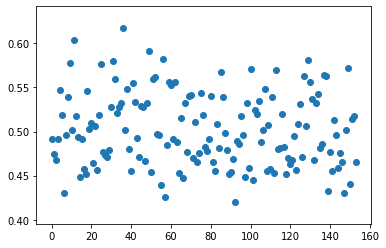

In [88]:
plt.scatter(range(len(y_pred_own)),y_pred_own)

In [89]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

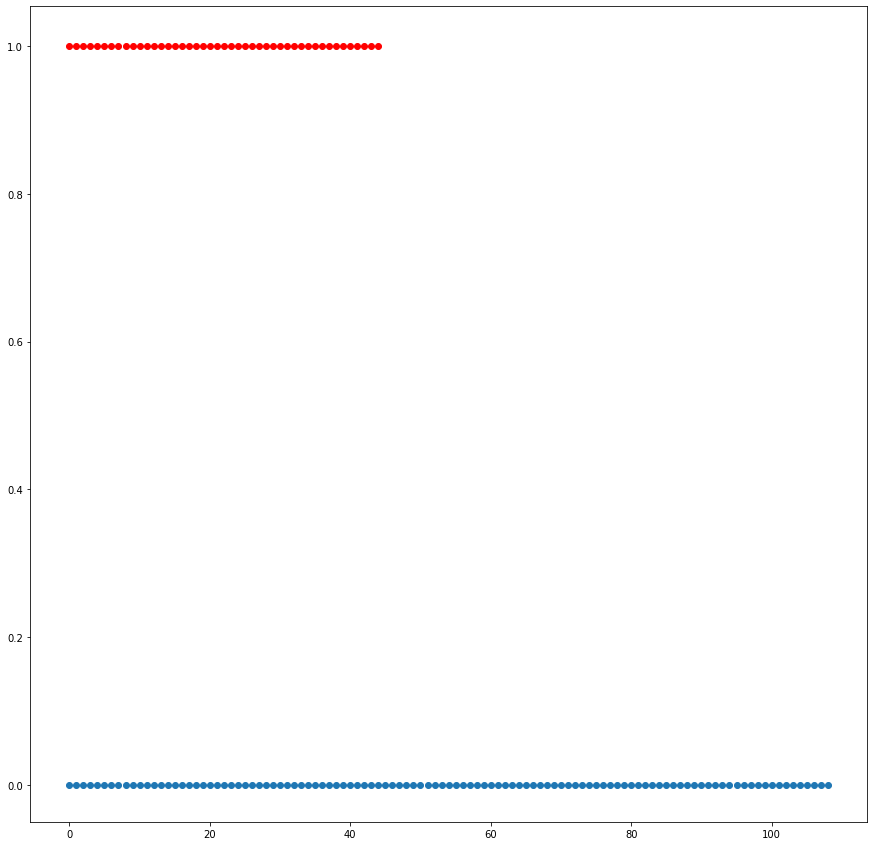

In [90]:
y_pred1 = [y for y in y_pred if y>0]
y_pred2 = [y for y in y_pred if y==0]
plt.figure(figsize=(15,15))
plt.scatter(range(len(y_pred1)),y_pred1, c='r')
plt.scatter(range(len(y_pred2)),y_pred2)

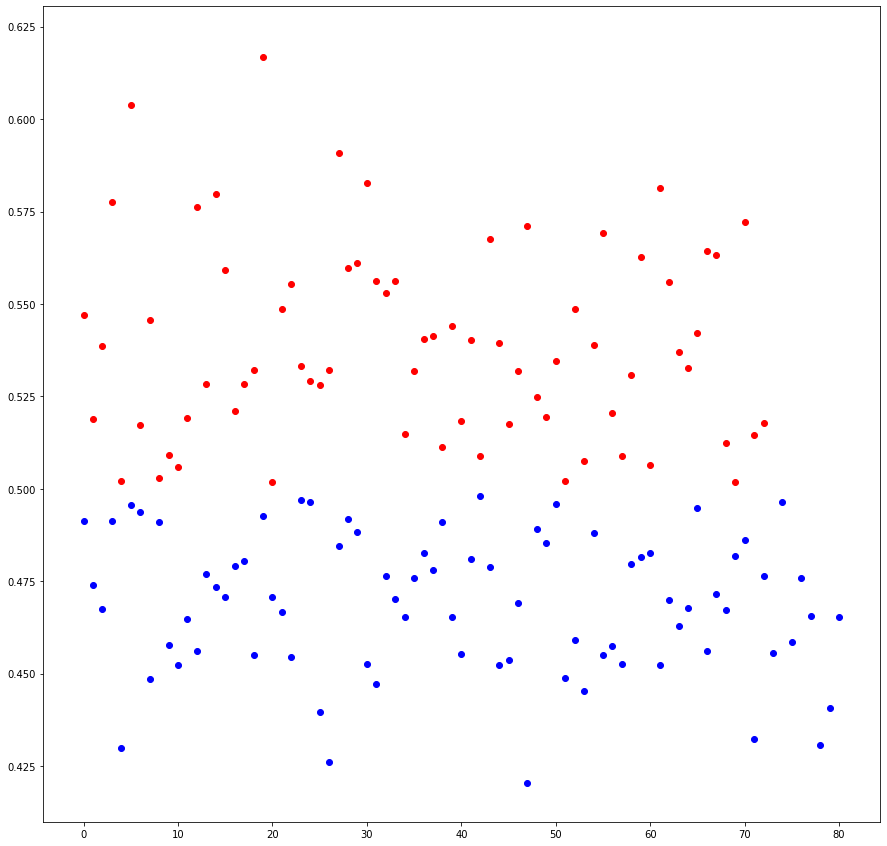

In [94]:
y_pred1 = [y for y in y_pred_own if y>0.5]
y_pred2 = [y for y in y_pred_own if y<0.5]
plt.figure(figsize=(15,15))
plt.scatter(range(len(y_pred1)),y_pred1, c='r')
plt.scatter(range(len(y_pred2)),y_pred2, c= 'b')